# Client side vs Server Side objects

In [1]:
import ee # Google Earth Engine Python Client
import geemap # frontend του ee Google Earth Engine


# gee authentication
ee.Authenticate()
ee.Initialize(project='civic-meridian-417810')

Ένα συχνό λάθος που μπορεί να κάνει ένας αρχάριος χρήστης του google earth engine API είναι η ανάμεικτη χρήση client side και server side objects, δηλαδή τυπικά objects της γλώσσας προγραμματισμού που χρησιμοποιούμε και εκτελούνται τοπικά και ιδιαίτερα objects που εκτελούνται απομακρυσμένα στον google earthn engine server.

Η ενότητα [Client Libraries](https://developers.google.com/earth-engine/apidocs#client-libraries) αποτελεί την τεχνική τεκμηρίωση (API Reference) του Google Earth Engine (GEE). Στην ουσία, είναι το "λεξικό" που εξηγεί πώς να επικοινωνείς με τους διακομιστές της Google χρησιμοποιώντας Python ή JavaScript.

Ακολουθεί η επεξήγηση των βασικών σημείων αυτής της ενότητας:

## Ο ρόλος των Client Libraries

Οι βιβλιοθήκες αυτές δεν εκτελούν την ανάλυση στον υπολογιστή σου. Λειτουργούν ως μεταφραστές:

Ο χρήστης γράφει κώδικα (π.χ. ee.Image(ID).clip(geometry)).

Η βιβλιοθήκη μετατρέπει αυτόν τον κώδικα σε ένα αντικείμενο JSON (ονομάζεται DAG - Directed Acyclic Graph).

Αυτό το αρχείο στέλνεται στην Google, η οποία εκτελεί τους υπολογισμούς και σου επιστρέφει το αποτέλεσμα.

## Δομή του API Reference

Η τεκμηρίωση είναι οργανωμένη με βάση τις Κλάσεις Αντικειμένων (Object Classes). Οι πιο σημαντικές είναι:

- ee.Image: Μέθοδοι για επεξεργασία ψηφιακών εικόνων (raster), όπως το .add() ή το .normalizedDifference().

- ee.ImageCollection: Εργαλεία για τη διαχείριση "στοιβών" εικόνων (π.χ. .filterDate(), .median()).

- ee.FeatureCollection: Μέθοδοι για διανυσματικά δεδομένα (vector), όπως το .filterBounds() ή το .aggregate_mean().

- ee.Algorithms: Εξειδικευμένοι αλγόριθμοι, όπως το ee.Algorithms.Terrain για την ανάλυση αναγλύφου και ορατότητας (Viewshed).


## Client vs. Server

Το API Reference περιγράφει αποκλειστικά αντικείμενα που ζουν στον Server της Google. Αυτός είναι ο λόγος που δεν μπορείς να χρησιμοποιήσεις απλή λογική Python πάνω τους αλλά εξειδικευμένες εντολές που τρέχουν στον Google server.


| **Λειτουργία**  | **Python Logic (Client-Side)** | **GEE API Logic (Server-Side)**   |
| --------------- | ------------------------------ | --------------------------------- |
| **Λογική**      | `if a > 30:`                   | `ee.Algorithms.If(a.gt(30), ...)` |
| **Επαναλήψεις** | `for i in range(10):`          | `collection.map(function)`        |
| **Μαθηματικά**  | `a + b`                        | `a.add(b)`                        |


## Παραδείγματα

Στο ακόλουθο παράδειγμα ορίζονται client side objects και server side objects. Ο χρήστης πρέπει να γνωρίζει ότι όποια εντολή ξεκινάει με `ee` (και όχι μόνον) θα εκτελεστεί στους διακομιστές της Google.

In [2]:
# Client side string
client_string = 'Hello World!'
print(type(client_string))

# Server side string
server_string = ee.String('Hello World!');
print(type(server_string))


<class 'str'>
<class 'ee.ee_string.String'>


Στο παρακάτω παράδειγμα εκτελούνται τοπικά στην Python, client side objects.

Οι παρακάτω μεταβλητές `a`,`b`,`c` είναι Python objects και υπάρχουν μόνο τοπικά στον υπολογιστή μας (client). Δεν έχουν καμία συσχέτιση με το google earth engine. 

In [3]:
a = 30
b = 12

c = a+b
print(c)

42


Στον παρακάτω κώδικα οι μεταβλητές `a`,`b` είναι server side objects δηλαδή έχουν δηλωθεί κατά τέτοιο τρόπο που θα εκτελεστούν στο Google Earth Engine (GEE).
Ωστόσο για να εκτελέσουμε πράξεις μεταξύ server side objects δεν μπορούμε να χρησιμοποιήσουμε μαθηματικές πράξεις που εκτελούνται σε client side objects δηλαδή τυπικές εντολές της python. Το παρακάτω script αποτυγχάνει γιατί η έκφραση `c = a + b` δεν συντάσσεται όπως θα έπρεπε ως server side εντολή. 

In [4]:
a=ee.Number(30) # a = server side object
b=ee.Number(12) # b = server side object

c = a + b # εντολές που εκτελούνται στον client side


TypeError: unsupported operand type(s) for +: 'Number' and 'Number'

Για να πάρουμε το άθροισμα των `a` και `b` πρέπει να χρησιμοποιήσουμε την server side συνάρτηση [add](https://developers.google.com/earth-engine/apidocs/ee-number-add) που αφορά server side objects και εκτελείται στον απομακρυσμένο server. 

In [ ]:
a=ee.Number(30)
b=ee.Number(12)

c=a.add(b)
print(c)

ee.Number({
  "functionInvocationValue": {
    "functionName": "Number.add",
    "arguments": {
      "left": {
        "constantValue": 30
      },
      "right": {
        "constantValue": 12
      }
    }
  }
})


Όπως βλέπουμε, το c είναι ένα αντικείμενο τύπου `ee.Number`. Για να πάρουμε την τιμή του, πρέπει να χρησιμοποιήσουμε την μέθοδο `.getInfo()`.

In [ ]:

print(c.getInfo())

42


Τι κάνει το `.getInfo()`;

Το Google Earth Engine ακολουθεί το lazy computational model. Όταν γράφεις κώδικα, η Python δεν ξέρει τις τιμές, απλά ετοιμάζει οδηγίες, τη "συνταγή". Το `.getInfo()` σε ένα object είναι μια εντολή που καλεί την Google να εκτελέσει στον server της τις οδηγίες από τις οποίες υπολογίζεται αυτό το object. Άρα ο χρήστης δεν πρέπει να έχει την εσφαλμένη εντύπωση ότι οι εντολές εκτελούνται τοπικά ή την εντύπωση ότι οι εντολές εκτελούνται αστραπιαία γιατί στην ουσία οι εντολές αυτές ετοιμάζουν οδηγίες για απομακρυσμένη εκτέλεση που ενεργοποιείται όταν καλέσουμε εντολές όπως το  `.getInfo()`

Ο χρήστης πρέπει να είναι πολύ προσεκτικός με την χρήση της εντολής `.getInfo()` γιατί  η κλήση της επιστρέφει τα δεδομένα που έχουν υπολογιστεί από τον server προς τον client.  Αυτό πολλές φορές μπορεί να οδηγήσει σε σφάλμα μνήμης. Αν ζητήσεις κάτι πολύ μεγάλο (π.χ. `.getInfo()` σε ένα μεγάλο imagecollection, το script θα καταρρεύσει). Επίσης λάθος είναι να κάνουμε χρήση του `.getInfo()` μέσω ενός βρόγχου (loop) γιατί αυτό που κάνουμε είναι να επικοινωνουμε πολλές φορές με τον απομακρυσμένο server και να καθυστερούμε την εκτέλεση του script.

Εναλλακτικά, για την εποπτεία των server side objects ο χρήστης έχει μπορεί να χρησιμοποιήσει μια πιο ασφαλή επιλογή, την συνάρτηση `display()` από την βιβλιοθήκη IPython.display. Στο παρακάτω παράδειγμα ο χρήστης θα λάβει λεπτομέρειες για την εικόνα _CGIAR/SRTM90_V4_

In [ ]:
image = ee.Image("CGIAR/SRTM90_V4")
display(image)

# Η βιβλιοθληκη geemap

Η βιβλιοθήκη [geemap](https://geemap.org) είναι ένα πακέτο της Python που σχεδιάστηκε από τον καθηγητή [Qiusheng Wu ](https://wetlands.io/)για να κάνει τη χρήση του Google Earth Engine (GEE) πιο εύκολη, διαδραστική και φιλική προς τον χρήστη, ειδικά μέσα σε περιβάλλοντα όπως το Jupyter Notebook και το Google Colab.

Η επίσημη βιβλιοθήκη της Google (ee) είναι πολύ ισχυρή αλλά με περιορισμένες δυνατότητες. Για παράδειγμα, δεν έχει ενσωματωμένο διαδραστικό χάρτη. Η geemap συνδυάζει το GEE με άλλες βιβλιοθήκες οπτικοποίησης (όπως η ipyleaflet και η folium).

Με την βιβλιοθήκη διαθέτει:

- Διαδραστική Χαρτογράφηση: Μπορείς να προσθέτεις layers, να αλλάζεις opacity και να κάνεις zoom σε έναν ζωντανό χάρτη.

- Εργαλεία Σχεδίασης: Μπορείς να σχεδιάσεις ένα πολύγωνο πάνω στον χάρτη και να το μετατρέψεις αμέσως σε αντικείμενο GEE (ee.Geometry) για ανάλυση.

- Μετατροπή Κώδικα: Μπορεί να μετατρέψει αυτόματα κώδικα JavaScript από το GEE Code Editor σε κώδικα Python.

- Συναρτήσεις λήψης δεδομένων απευθείας στον υπολογιστή του χρήστη.

- Επιθεώρηση Δεδομένων (Inspector) μέσω ειδικού εργαλείο πάνω στον χάρτη.

# Feature collections

Στο Google Earth Engine, ένα FeatureCollection είναι μια ομάδα από Features και στην ουσία πρόκειται για τον τρόπο αποθήκευσης και διάθεσης διανυσματικών δεδομένων. 
Ένα FeatureCollection είναι μια ιεραρχική δομή:

- Geometry: Η τοποθεσία (Σημείο, Γραμμή, Πολύγωνο).

- Properties: Ένα λεξικό (dictionary) με δεδομένα που περιγράφουν τη γεωμετρία (π.χ. το όνομα μιας πόλης, ο πληθυσμός της, το μέγεθος ενός σεισμού).

- Feature: Ο συνδυασμός Geometry και Properties.

- FeatureCollection: Η συλλογή πολλών τέτοιων Features.

Οι πηγές δεδομένων FeatureCollection είναι είτε από έτοιμα σύνολα που διαθέτει η Google, ή από δεδομένα που μεταφορτώνουμε στον χώρο "Assets" της google, είτε από outputs που παράγονται κατά την εκτέλεση του κώδικα.

Με τα FeatureCollectionς ο χρήστης μπορεί να φιλτράρει δεδομένα, να εκτελέσει spatial joins ή μπορεί να τα χρησιμοποιήσει για να υπολογιίσει στατιστικά εικόνων για μια συγκεκριμένη περιοχή.

Περισσότερα για τα Features και τα FeatureCollections [εδώ](https://developers.google.com/earth-engine/guides/features).

Στον παρακάτω κώδικα, φορτώνουμε ένα FeatureCollection από την συλλογή [FAO GAUL 500m Simplified: Global Administrative Unit Layers 2015, Second-Level Administrative Units](https://developers.google.com/earth-engine/datasets/catalog/FAO_GAUL_SIMPLIFIED_500m_2015_level2):


In [7]:
# Φόρτωση του FeatureCollection
dataset = ee.FeatureCollection('FAO/GAUL_SIMPLIFIED_500m/2015/level2')

# Δημιουργία του διαδραστικού χάρτη
Map = geemap.Map(center=[42.682, 12.876], zoom=4)


# Ορισμός των παραμέτρων στυλ
# style_params = {
#   'fillColor': 'b5ffb4',
#   'color': 'red',
#   'width': 1.0,
# }

# Εφαρμογή του στυλ στο dataset
#styled_dataset = dataset.style(**style_params)



# Προσθήκη υποβάθρου στον χάρτη
Map.add_basemap('Esri.OceanBasemap', True)
Map.add_basemap('Esri.NatGeoWorldMap',False)
Map.add_basemap('CartoDB.Positron', False)



# Προσθήκη στον χάρτη

Map.addLayer(dataset, {'color': 'black'}, 'Global Administrative Unit Layers (GAUL)- Level 2')

# Εναλλακτικά
# Στο Python API, το dataset που έχει ήδη γίνει .style() 
# προστίθεται με κενό dictionary παραμέτρων οπτικοποίησης {}
#Map.addLayer(styled_dataset, {}, 'Global Administrative Unit Layers (GAUL)- Level 2')


# Εμφάνιση του χάρτη 
Map

Map(center=[42.682, 12.876], controls=(WidgetControl(options=['position', 'transparent_bg'], position='toprigh…

Ο χρήστης μπορεί να λάβει τα διαθέσιμα απο το geemap υπόβαθρα με την παρακάτω εντολή:

In [ ]:
list(geemap.basemaps.keys())

['OpenStreetMap',
 'Esri.WorldStreetMap',
 'Esri.WorldImagery',
 'Esri.WorldTopoMap',
 'FWS NWI Wetlands',
 'FWS NWI Wetlands Raster',
 'NLCD 2021 CONUS Land Cover',
 'NLCD 2019 CONUS Land Cover',
 'NLCD 2016 CONUS Land Cover',
 'NLCD 2013 CONUS Land Cover',
 'NLCD 2011 CONUS Land Cover',
 'NLCD 2008 CONUS Land Cover',
 'NLCD 2006 CONUS Land Cover',
 'NLCD 2004 CONUS Land Cover',
 'NLCD 2001 CONUS Land Cover',
 'USGS NAIP Imagery',
 'USGS NAIP Imagery False Color',
 'USGS NAIP Imagery NDVI',
 'USGS Hydrography',
 'USGS 3DEP Elevation',
 'ESA Worldcover 2020',
 'ESA Worldcover 2020 S2 FCC',
 'ESA Worldcover 2020 S2 TCC',
 'ESA Worldcover 2021',
 'ESA Worldcover 2021 S2 FCC',
 'ESA Worldcover 2021 S2 TCC',
 'BaseMapDE.Color',
 'BaseMapDE.Grey',
 'BasemapAT.basemap',
 'BasemapAT.grau',
 'BasemapAT.highdpi',
 'BasemapAT.orthofoto',
 'BasemapAT.overlay',
 'BasemapAT.surface',
 'BasemapAT.terrain',
 'CartoDB.DarkMatter',
 'CartoDB.DarkMatterNoLabels',
 'CartoDB.DarkMatterOnlyLabels',
 'Carto

Μπορούμε να λάβουμε τα properties ενός feature ως εξής:

In [10]:
# Παίρνουμε το πρώτο στοιχείο και ζητάμε τις ιδιότητές του
first_feature = dataset.first()
display(first_feature)

ή να πάρουμε τις μοναδικές τιμές μιας στήλης π.χ. της στήλης _ADM0_NAME_

In [8]:
country_names = dataset.aggregate_array('ADM0_NAME').distinct().sort().getInfo()
country_names

['Abyei',
 'Afghanistan',
 'Aksai Chin',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Arunachal Pradesh',
 'Ashmore and Cartier Islands',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Azores Islands',
 'Bahamas',
 'Bahrain',
 'Baker Island',
 'Bangladesh',
 'Barbados',
 'Bassas da India',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bird Island',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Bouvet Island',
 'Brazil',
 'British Indian Ocean Territory',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'China/India',
 'Christmas Island',
 'Clipperton Island',
 'Cocos (Keeling) Islands',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cypru

Επιπλέον μπορούμε να φιλτράρουμε τις διοικητικές ενότητες μιας χώρας κάνοντας χρήση φίλτρων:

In [9]:
greece_admin = dataset.filter(ee.Filter.eq('ADM0_NAME', 'Greece'))


Για να διαπιστώσουμε το πλήθος των features που περιλαμβάνει ένα featurecollection καλούμε την μέθοδο `size()`.

In [22]:
print(greece_admin.size().getInfo())
print(dataset.size().getInfo())

56
38258


In [10]:
# Ορισμός της λίστας χωρών
countries_list = ['France', 'Greece', 'Spain']

# Εφαρμογή του φίλτρου .inList()

filtered_countries = dataset.filter(ee.Filter.inList('ADM0_NAME', countries_list))

# Ορισμός στυλ (χρώμα περιγράμματος και πάχος)
style_params = {
    'fillColor': 'gray', # Το '88' στο τέλος προσθέτει ημιδιαφάνεια (hex)
    'color': 'black',
    'width': 1.0
}

Map.addLayer(filtered_countries.style(**style_params), {}, 'Global Administrative Unit Layers (GAUL)- Level 2 - Filtered')

# 6. Αυτόματο κεντράρισμα στα επιλεγμένα στοιχεία
Map.centerObject(filtered_countries, 5)

Map

Map(bottom=351.0, center=[43.27207427319743, 2.1570147511756734], controls=(WidgetControl(options=['position',…

Για να μεταφέρεις δεδομένα από το Earth Engine (filtered_fc) σε ένα GeoDataFrame της βιβλιοθήκης GeoPandas, η geemap προσφέρει μια πολύ συνάρτηση που ονομάζεται `ee_to_gdf()`.

Αυτή η διαδικασία μετατρέπει τα server-side δεδομένα της Google σε τοπικά objects στην μνήμη της Python, επιτρέποντάς σου να χρησιμοποιήσεις όλες τις δυνατότητες του GeoPandas.

In [11]:
gdf = geemap.ee_to_gdf(filtered_countries)


In [12]:
gdf.head()

,geometry,ADM0_CODE,ADM0_NAME,ADM1_CODE,ADM1_NAME,ADM2_CODE,ADM2_NAME,DISP_AREA,EXP2_YEAR,STATUS,STR2_YEAR,Shape_Area,Shape_Leng
0,"POLYGON ((23.61861 41.35559, 23.63433 41.31068...",97,Greece,1336,Anatoliki Makedonia Kai Thraki,16675,Dramas,NO,3000,Member State,1000,0.399487,3.355869
1,"MULTIPOLYGON (((25.44666 40.49322, 25.46013 40...",97,Greece,1336,Anatoliki Makedonia Kai Thraki,16676,Evrou,NO,3000,Member State,1000,0.446699,4.806090
2,"MULTIPOLYGON (((23.8881 40.78068, 23.92404 40....",97,Greece,1336,Anatoliki Makedonia Kai Thraki,16677,Kavalas,NO,3000,Member State,1000,0.206936,3.761512
3,"MULTIPOLYGON (((25.06937 41.12877, 25.07386 41...",97,Greece,1336,Anatoliki Makedonia Kai Thraki,16678,Rodopis,NO,3000,Member State,1000,0.275509,2.608792
4,"POLYGON ((24.472 41.18716, 24.48772 41.18042, ...",97,Greece,1336,Anatoliki Makedonia Kai Thraki,16679,Xanthis,NO,3000,Member State,1000,0.198942,2.493176


<Axes: >

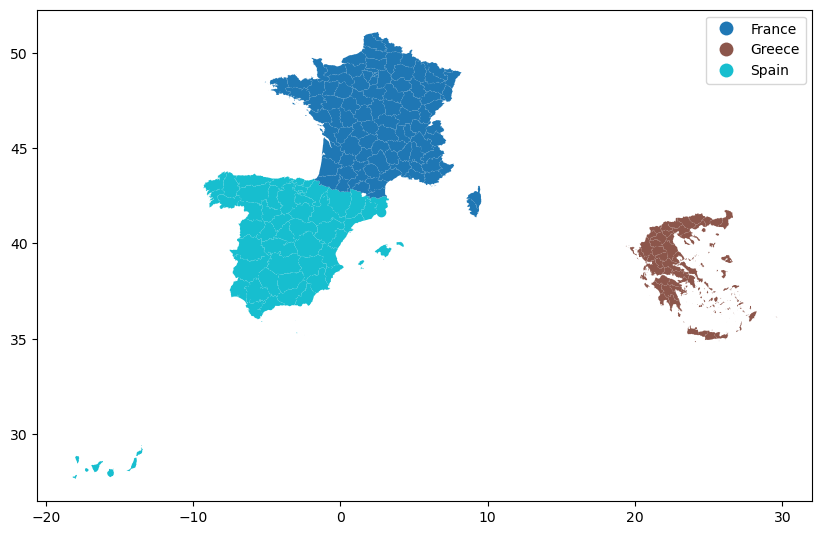

In [16]:
gdf.plot(column='ADM0_NAME', legend=True, figsize=(10, 10))

Ακόμη ο χρήστης μπορεί να εξάγει ένα featurecollection object στο google drive. 
Eπειδή τα featurecollection ενδέχεται να περιέχουν πολλαπλούς τύπους γεωμετρίας, αν θέλουμε να εξάγουμε τα δεδομένα μας σας shapefile τότε θα πρέπει να κρατήσουμε τον έναν από αυτόν (πχ πολύγωνα). Σε αυτήν την περίπτωση πρέπει να φιλτράρουμε και να κρατήσουμε μόνο τα features που περιλαμβάνουν τύπο γεωμετρίας `Polygon`.


In [13]:
greece_admin_poly = greece_admin.map(lambda f: f.set('geom_type', f.geometry().type())) \
                           .filter(ee.Filter.equals('geom_type', 'Polygon'))

In [107]:
# Ορισμός της εργασίας εξαγωγής
task = ee.batch.Export.table.toDrive(
    collection=greece_admin_poly,
    description='Export for Greece', # Το όνομα της εργασίας εξαγωγής
    folder='GEE_Exports',          # Το όνομα του φακέλου στο Google Drive σας
    fileNamePrefix='Greece', # Το όνομα του αρχείου
    fileFormat='SHP'               # Επιλογές: 'CSV', 'GeoJSON', 'KML', 'SHP'
)

# Εκκίνηση της εργασίας
task.start()



Ο χρήστης μπορεί να επιτηρεί την διαδικασία εξαγωγής σαν ένα task στον Tasks Page της Cloud Console του project που χρησιμοποιεί:

https://console.cloud.google.com/earth-engine/tasks?project=civic-meridian-417810

Σε αυτή την περίπτωση θα αναγνωρίσει ότι εκτελείται το task του με το όνομα που έχει δηλώσει:

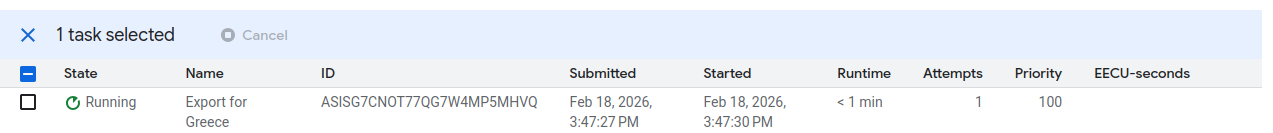

Εναλλακτικά αντί για shapefile μπορούμε να εξάγουμε τα δεδομένα στο GeoJSON που υποστηρίζει πολλαπλούς γεωμετρικούς τύπους.

In [19]:
# Ορισμός της εργασίας εξαγωγής
task = ee.batch.Export.table.toDrive(
    collection=greece_admin,
    description='Export for Greece-GeoJSON', # Το όνομα της εργασίας εξαγωγής
    folder='GEE_Exports',          # Το όνομα του φακέλου στο Google Drive σας
    fileNamePrefix='Greece', # Το όνομα του αρχείου
    fileFormat='GeoJSON'               # Επιλογές: 'CSV', 'GeoJSON', 'KML', 'SHP'
)

# Εκκίνηση της εργασίας
task.start()



Ο χρήστης πέρα από τα δεδομένα που παρέχει η google μπορεί να φορτώσει δικά του δεδομένα στην περιοχή "Assets"  του project που χρησιμοποιεί και να τα διαβάσει με την ίδια διαδικασία.

In [14]:
# Ανάγνωση του Feature Collection από το συγκεκριμένο path
nuts_level2 = ee.FeatureCollection('projects/civic-meridian-417810/assets/NUTS_RG_01M_2021_4326_LEVL_2')

# Δημιουργία χάρτη
Map = geemap.Map()


# Προσθήκη στον χάρτη
Map.addLayer(nuts_level2, {'color': 'black'}, 'NUTS Level 2 (2021)')

# 6. Κεντράρισμα στην Ευρώπη
Map.setCenter(15, 50, 4)

Map

Map(center=[50, 15], controls=(WidgetControl(options=['position', 'transparent_bg'], position='topright', tran…

Άλλος ένας τρόπος φιλτραρίσματος των features από μια συλλογή featurecollection είναι μέσω του `.filterBound()`. Σε αυτή την περίπτωση επιλέγονται τα features η γεωμετρία των οποίων τέμνει μια άλλη γεωμετρία. Στο παρακάτω παράδειγμα αντλούνται γεωμετρίες μέσω των εργαλείων σχεδιασμού του χάρτη. Τα σχεδιασμένα στον χάρτη σχήματα μπορούν να επιστραφούν είτε ως γεωμετρίες (Map.user_roi) ή σαν featurecollection (m._user_rois).


In [37]:
roi = Map.user_rois # ή Map.user_rois
nuts_level2_filtered = nuts_level2.filterBounds(roi)

# Προσθήκη στον χάρτη
Map.addLayer(nuts_level2_filtered, {'color': 'red'}, 'NUTS Level 2 (2021)-filtered')



Το φιλτράρισμα των δεδομένων μπορεί να γίνει και με βάση μια στήλη με αριθμητικά δεδομένα. Στο παρακάτω παράδειγμα υπολογίζεται το εμβαδό σε km2 και στην συνέχεια επιλέγονται όσα NUTS2 έχουν εμβαδό μικρότερο από 1000 km2.

In [ ]:
# 2. Συνάρτηση για τον υπολογισμό εμβαδού
def calculate_area(feature):
    # Υπολογισμός εμβαδού σε m2 και μετατροπή σε km2
    area_km2 = feature.geometry().area().divide(1000000)
    # Προσθήκη της τιμής ως νέα ιδιότητα (property) στο feature
    return feature.set('area_sq_km', area_km2)

# 3. Εφαρμογή της συνάρτησης σε όλη τη συλλογή
nuts_with_area = nuts_level2.map(calculate_area)

# 4. Φιλτράρισμα: Κράτησε μόνο όσα έχουν εμβαδόν < 1000 km2
filtered_nuts = nuts_with_area.filter(ee.Filter.lt('area_sq_km', 1000))

# --- Έλεγχος Αποτελεσμάτων ---
print(f"Αρχικό πλήθος περιοχών: {nuts_level2.size().getInfo()}")
print(f"Πλήθος μετά το φίλτρο (>100 km2): {filtered_nuts.size().getInfo()}")

# Προσθήκη στον χάρτη
Map.addLayer(filtered_nuts, {'color': 'blue'}, 'NUTS2 < 1000km2')

Αρχικό πλήθος περιοχών: 334
Πλήθος μετά το φίλτρο (>100 km2): 21


Με την λογική που προαναφέρθηκε ο χρήστης μπορεί να εξάγει το featurecollection ως shapefile στο Google drive

In [10]:
# Ορισμός της εργασίας εξαγωγής
task = ee.batch.Export.table.toDrive(
    collection=nuts_level2,
    description='Export NUTS2', # Το όνομα της εργασίας εξαγωγής
    folder='GEE_Exports',          # Το όνομα του φακέλου στο Google Drive σας
    fileNamePrefix='NUTS2_2021', # Το όνομα του αρχείου
    fileFormat='SHP'               # Επιλογές: 'CSV', 'GeoJSON', 'KML', 'SHP'
)

# Εκκίνηση της εργασίας
task.start()


## Bounding box και Convex hull

Μέσω ενός featurecollection μπορούμε να αντλήσουμε χρήσιμα χαρακτηριστικά του όπως είναι το bounding box ή το convex hull.

In [ ]:
# Επιστρέφει το bounding box που περιέχει όλη τη συλλογή
bounds = greece_admin.geometry().bounds()
convexHull = greece_admin.geometry().convexHull()

Map.addLayer(bounds, {'color': 'red'}, 'Bounding Box')

Map.addLayer(convexHull, {'color': 'green'}, 'convexHull')

## Δημιουργία geometry objects

Για την δημιουργία γεωμετριών στο Google Earth Engine (GEE), ο χρήστης χρησιμοποιεί τις κλάσεις `ee.Geometry.Point`, `ee.Geometry.LineString` και `ee.Geometry.Polygon`.

Τι πρέπει να γνωρίζεις για τις γεωμετρίες:

- Σύστημα Συντεταγμένων: Το GEE χρησιμοποιεί από προεπιλογή το σύστημα WGS84 (EPSG:4326), οπότε οι συντεταγμένες πρέπει να είναι σε δεκαδική μορφή (π.χ. 23.72 αντί για 23° 43').

- Σειρά Long/Lat: Πάντα βάζουμε πρώτα το Γεωγραφικό Μήκος (Longitude) και μετά το Γεωγραφικό Πλάτος (Latitude).

- Κλείσιμο Πολυγώνου: Στο ee.Geometry.Polygon, η λίστα των σημείων πρέπει να είναι μια λίστα μέσα σε λίστα (double brackets [[ ]]) και το τελευταίο σημείο πρέπει να είναι ταυτόσημο με το πρώτο για να "κλείσει" το σχήμα.

In [4]:
# 1. Αρχικοποίηση
Map = geemap.Map()

# Σημείο (Point) - π.χ. κοντά στην Αθήνα
point = ee.Geometry.Point([23.7275, 37.9838])

# Γραμμή (LineString) - π.χ. μια διαδρομή στην Πελοπόννησο
line = ee.Geometry.LineString([
    [22.4303, 37.5089], # Τρίπολη
    [22.1757, 38.0361]  # Καλάβρυτα
])

# Πολύγωνο (Polygon) - π.χ. ένα τρίγωνο στη Θεσσαλία
polygon = ee.Geometry.Polygon([
    [
        [22.413, 39.639], # Λάρισα
        [21.921, 39.555], # Τρίκαλα
        [21.767, 39.364], # Καρδίτσα
        [22.413, 39.639]  # Κλείσιμο πολυγώνου (ίδιο με το πρώτο σημείο)
    ]
])

# 3. Προσθήκη στον χάρτη
Map.addLayer(point, {'color': 'red'}, 'Random Point')
Map.addLayer(line, {'color': 'blue'}, 'Random Line')
Map.addLayer(polygon, {'color': 'green', 'fillColor': 'green'}, 'Random Polygon')

# Κεντράρισμα στην Ελλάδα
Map.setCenter(23.7, 38.2, 7)


Map

Map(center=[38.2, 23.7], controls=(WidgetControl(options=['position', 'transparent_bg'], position='topright', …

Ωστόσο τα παραπάνω objects διαθέτουν μόνον γεωγραφική πληροφορία, για να ενσωματωθεί και περιγραφική πληροφορία πρέπει να δημιουργηθούν featurecollections.

In [11]:
import ee
import geemap

# 1. Αρχικοποίηση
Map = geemap.Map()

# --- ΣΗΜΕΙA (POINTS) ---
# Ορισμός των σημείων (Συντεταγμένες: [Longitude, Latitude])
athens_geom = ee.Geometry.Point([23.7275, 37.9838])
patra_geom = ee.Geometry.Point([21.7346, 38.2466])
thess_geom = ee.Geometry.Point([22.9444, 40.6401])

# 3. Μετατροπή των γεωμετριών σε Features με ιδιότητες
athens_feature = ee.Feature(athens_geom, {'name': 'Athens', 'category': 'Capital'})
patra_feature = ee.Feature(patra_geom, {'name': 'Patra', 'category': 'City'})
thess_feature = ee.Feature(thess_geom, {'name': 'Thessaloniki', 'category': 'City'})

# 4. Δημιουργία ενός ενιαίου FeatureCollection με όλα τα σημεία
point_fc = ee.FeatureCollection([athens_feature, patra_feature, thess_feature])

# --- ΓΡΑΜΜΗ (LINE) ---
line_geom = ee.Geometry.LineString([[22.430, 37.508], [22.175, 38.036]])
line_feature = ee.Feature(line_geom, {'name': 'Γραμμή στην Πελοπόννησο', 'category': 'Road'})
line_fc = ee.FeatureCollection([line_feature])

# --- ΠΟΛΥΓΩΝΟ (POLYGON) ---
poly_geom = ee.Geometry.Polygon([[[22.41, 39.63], [21.92, 39.55], [21.76, 39.36], [22.41, 39.63]]])
poly_feature = ee.Feature(poly_geom, {'name': 'Πολύγωνο στην Θεσσαλία', 'category': 'Land Cover'})
poly_fc = ee.FeatureCollection([poly_feature])

# 2. Προσθήκη στον χάρτη
Map.addLayer(point_fc, {'color': 'red'}, 'Point FC')
Map.addLayer(line_fc, {'color': 'blue'}, 'Line FC')
Map.addLayer(poly_fc, {'color': 'green'}, 'Polygon FC')

# 3. Κεντράρισμα στην Ελλάδα
Map.setCenter(23.0, 38.5, 7)

Map

Map(center=[38.5, 23.0], controls=(WidgetControl(options=['position', 'transparent_bg'], position='topright', …